In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import random

In [118]:
# Upload China data
China_df = pd.read_csv('China Meta Data Modified.csv')
China_df.head()

,year,ticket sold (Millions),total gross (Millions CNY),total gross (Millions USD),# of screens,Avg. ticket price (CNY,Avg. ticket price (USD),# of new movies released,dollar_ppp,dollar_valuation,Population,Average Wage (Yuan),Average Wage (USD),USD:CNY Exchange Rate (Closing),"Tickets Sold per 100,000 Population",Gross per Capita (USD)
0,2012,463.26,16563.40,2658.65,"13,118",36,9.94,394,3.62,-43.39,1350695000,46769,12920,6.23,"34,298.00",1.97
1,2013,614.24,21474.03,3549.43,"18,195",35,9.97,345,3.51,-42.76,1357380000,51483,14668,6.05,"45,252.00",2.61
2,2014,834.31,29430.42,4746.84,"23,592",35,9.94,389,3.52,-43.14,1364270000,56360,16011,6.20,"61,154.00",3.48
3,2015,"1,260.89",43880.45,6771.67,"31,627",35,9.86,522,3.55,-42.84,1371220000,62029,17473,6.48,"91,954.00",4.94
4,2016,"1,373.63",45520.44,6549.70,"41,056",33,8.92,531,3.70,-44.70,1378665000,67569,18262,6.95,"99,635.00",4.75


In [119]:
# Create new labels for China data
list_labels_China = ['Year','Tickets Sold (Millions)','Total Gross (Millions CNY)','Total Gross (Millions USD)', 'Number of Screens',
                     'Ticket Price (CNY)','Ticket Price (USD)','Movies Released','Dollar Purchasing Parity',
                     'Dollar Valuation (%)','Population','Average Wage (CNY)','Average Wage (USD)','USD:CNY Exchange Rate',
                     'Tickets Sold per 100,000 Population','Gross per Capita (USD)']
China_df.columns = list_labels_China
China_df.head()

,Year,Tickets Sold (Millions),Total Gross (Millions CNY),Total Gross (Millions USD),Number of Screens,Ticket Price (CNY),Ticket Price (USD),Movies Released,Dollar Purchasing Parity,Dollar Valuation (%),Population,Average Wage (CNY),Average Wage (USD),USD:CNY Exchange Rate,"Tickets Sold per 100,000 Population",Gross per Capita (USD)
0,2012,463.26,16563.40,2658.65,"13,118",36,9.94,394,3.62,-43.39,1350695000,46769,12920,6.23,"34,298.00",1.97
1,2013,614.24,21474.03,3549.43,"18,195",35,9.97,345,3.51,-42.76,1357380000,51483,14668,6.05,"45,252.00",2.61
2,2014,834.31,29430.42,4746.84,"23,592",35,9.94,389,3.52,-43.14,1364270000,56360,16011,6.20,"61,154.00",3.48
3,2015,"1,260.89",43880.45,6771.67,"31,627",35,9.86,522,3.55,-42.84,1371220000,62029,17473,6.48,"91,954.00",4.94
4,2016,"1,373.63",45520.44,6549.70,"41,056",33,8.92,531,3.70,-44.70,1378665000,67569,18262,6.95,"99,635.00",4.75


In [120]:
# Eliminate Commas
China_df['Tickets Sold (Millions)'] = China_df['Tickets Sold (Millions)'].replace({',': ''}, regex=True)
China_df['Number of Screens'] = China_df['Number of Screens'].replace({',': ''}, regex=True)
China_df['Tickets Sold per 100,000 Population'] = China_df['Tickets Sold per 100,000 Population'].replace({',': ''}, regex=True)
China_df.head()

,Year,Tickets Sold (Millions),Total Gross (Millions CNY),Total Gross (Millions USD),Number of Screens,Ticket Price (CNY),Ticket Price (USD),Movies Released,Dollar Purchasing Parity,Dollar Valuation (%),Population,Average Wage (CNY),Average Wage (USD),USD:CNY Exchange Rate,"Tickets Sold per 100,000 Population",Gross per Capita (USD)
0,2012,463.26,16563.40,2658.65,13118,36,9.94,394,3.62,-43.39,1350695000,46769,12920,6.23,34298.00,1.97
1,2013,614.24,21474.03,3549.43,18195,35,9.97,345,3.51,-42.76,1357380000,51483,14668,6.05,45252.00,2.61
2,2014,834.31,29430.42,4746.84,23592,35,9.94,389,3.52,-43.14,1364270000,56360,16011,6.20,61154.00,3.48
3,2015,1260.89,43880.45,6771.67,31627,35,9.86,522,3.55,-42.84,1371220000,62029,17473,6.48,91954.00,4.94
4,2016,1373.63,45520.44,6549.70,41056,33,8.92,531,3.70,-44.70,1378665000,67569,18262,6.95,99635.00,4.75


In [121]:
# Convert values to numeric
col = China_df.columns
China_df[col] = China_df[col].apply(pd.to_numeric, errors='coerce')
China_df=China_df.dropna()
China_df.head()

,Year,Tickets Sold (Millions),Total Gross (Millions CNY),Total Gross (Millions USD),Number of Screens,Ticket Price (CNY),Ticket Price (USD),Movies Released,Dollar Purchasing Parity,Dollar Valuation (%),Population,Average Wage (CNY),Average Wage (USD),USD:CNY Exchange Rate,"Tickets Sold per 100,000 Population",Gross per Capita (USD)
0,2012,463.26,16563.40,2658.65,13118,36,9.94,394,3.62,-43.39,1350695000,46769,12920,6.23,34298.0,1.97
1,2013,614.24,21474.03,3549.43,18195,35,9.97,345,3.51,-42.76,1357380000,51483,14668,6.05,45252.0,2.61
2,2014,834.31,29430.42,4746.84,23592,35,9.94,389,3.52,-43.14,1364270000,56360,16011,6.20,61154.0,3.48
3,2015,1260.89,43880.45,6771.67,31627,35,9.86,522,3.55,-42.84,1371220000,62029,17473,6.48,91954.0,4.94
4,2016,1373.63,45520.44,6549.70,41056,33,8.92,531,3.70,-44.70,1378665000,67569,18262,6.95,99635.0,4.75


In [122]:
# Upload Japan data
Japan_df = pd.read_csv('Japan Meta Data Modified.csv')
Japan_df.head()

,year,ticket sold(millions),total gross (Million JPY),total gross (Millions USD),# of screens,Avg. ticket price (yen),Average ticket price (USD),# of new movies released,dollar_ppp,dollar_valuation,Population,Average_wage (Yen),Average_wage (USD),USD to JPY Exchange Rate,"Tickets Sold per 100,000 Population",Gross per Capita (USD)
0,2012,155,"195,190",2252.89,"3,290",1258,17.01,983,73.95,-5.46,127629000,4205935,56875,86.64,121570,17.65
1,2013,156,"194,237",1845.48,"3,318",1246,17.74,1117,70.23,-29.85,127445000,4194768,59729,105.25,122318,14.48
2,2014,161,"207,034",1727.44,"3,364",1285,16.65,1184,77.16,-24.00,127276000,4201839,54456,119.85,126588,13.57
3,2015,167,"217,119",1805.26,"3,437",1303,16.87,1136,77.24,-37.67,127141000,4214220,54560,120.27,131059,14.20
4,2016,180,"235,508",2013.58,"3,472",1307,17.81,1149,73.40,-31.20,126994511,4263647,58088,116.96,141887,15.86


In [123]:
list_labels_Japan = ['Year','Tickets Sold (Millions)','Total Gross (Millions JPY)','Total Gross (Millions USD)', 
                     'Number of Screens', 'Ticket Price (JPY)','Ticket Price (USD)','Movies Released',
                     'Dollar Purchasing Parity','Dollar Valuation (%)','Population','Average Wage (JPY)',
                     'Average Wage (USD)','USD to JPY Exchange Rate','Tickets Sold per 100,000 Population','Gross per Capita (USD)']

In [124]:
# Create new labels
Japan_df.columns = list_labels_Japan
Japan_df.head()

,Year,Tickets Sold (Millions),Total Gross (Millions JPY),Total Gross (Millions USD),Number of Screens,Ticket Price (JPY),Ticket Price (USD),Movies Released,Dollar Purchasing Parity,Dollar Valuation (%),Population,Average Wage (JPY),Average Wage (USD),USD to JPY Exchange Rate,"Tickets Sold per 100,000 Population",Gross per Capita (USD)
0,2012,155,"195,190",2252.89,"3,290",1258,17.01,983,73.95,-5.46,127629000,4205935,56875,86.64,121570,17.65
1,2013,156,"194,237",1845.48,"3,318",1246,17.74,1117,70.23,-29.85,127445000,4194768,59729,105.25,122318,14.48
2,2014,161,"207,034",1727.44,"3,364",1285,16.65,1184,77.16,-24.00,127276000,4201839,54456,119.85,126588,13.57
3,2015,167,"217,119",1805.26,"3,437",1303,16.87,1136,77.24,-37.67,127141000,4214220,54560,120.27,131059,14.20
4,2016,180,"235,508",2013.58,"3,472",1307,17.81,1149,73.40,-31.20,126994511,4263647,58088,116.96,141887,15.86


In [125]:
# Remove commas
Japan_df['Total Gross (Millions JPY)'] = Japan_df['Total Gross (Millions JPY)'].replace({',': ''}, regex=True)
Japan_df['Number of Screens'] = Japan_df['Number of Screens'].replace({',': ''}, regex=True)

In [126]:
# Convert values to numeric
col = Japan_df.columns
Japan_df[col] = Japan_df[col].apply(pd.to_numeric, errors='coerce')
Japan_df.head()

,Year,Tickets Sold (Millions),Total Gross (Millions JPY),Total Gross (Millions USD),Number of Screens,Ticket Price (JPY),Ticket Price (USD),Movies Released,Dollar Purchasing Parity,Dollar Valuation (%),Population,Average Wage (JPY),Average Wage (USD),USD to JPY Exchange Rate,"Tickets Sold per 100,000 Population",Gross per Capita (USD)
0,2012,155,195190,2252.89,3290,1258,17.01,983,73.95,-5.46,127629000,4205935,56875,86.64,121570,17.65
1,2013,156,194237,1845.48,3318,1246,17.74,1117,70.23,-29.85,127445000,4194768,59729,105.25,122318,14.48
2,2014,161,207034,1727.44,3364,1285,16.65,1184,77.16,-24.00,127276000,4201839,54456,119.85,126588,13.57
3,2015,167,217119,1805.26,3437,1303,16.87,1136,77.24,-37.67,127141000,4214220,54560,120.27,131059,14.20
4,2016,180,235508,2013.58,3472,1307,17.81,1149,73.40,-31.20,126994511,4263647,58088,116.96,141887,15.86


In [127]:
#result = pd.concat([df1, df4], axis=1, join_axes=[df1.index])
Total = pd.concat([China_df,Japan_df], axis=1, ignore_index = True)
Total.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,2012,463.26,16563.40,2658.65,13118,36,9.94,394,3.62,-43.39,...,17.01,983,73.95,-5.46,127629000,4205935,56875,86.64,121570,17.65
1,2013,614.24,21474.03,3549.43,18195,35,9.97,345,3.51,-42.76,...,17.74,1117,70.23,-29.85,127445000,4194768,59729,105.25,122318,14.48
2,2014,834.31,29430.42,4746.84,23592,35,9.94,389,3.52,-43.14,...,16.65,1184,77.16,-24.00,127276000,4201839,54456,119.85,126588,13.57
3,2015,1260.89,43880.45,6771.67,31627,35,9.86,522,3.55,-42.84,...,16.87,1136,77.24,-37.67,127141000,4214220,54560,120.27,131059,14.20
4,2016,1373.63,45520.44,6549.70,41056,33,8.92,531,3.70,-44.70,...,17.81,1149,73.40,-31.20,126994511,4263647,58088,116.96,141887,15.86


In [128]:
list_labels_Total = ['Year','Tickets Sold in China (Millions)','Total Gross in China (Millions CNY)','Total Gross in China (Millions USD)',
                     'Number of Screens in China',
                     'Ticket Price in China (CNY)','Ticket Price in China (USD)','Movies Released in China','Dollar Purchasing Parity in China',
                     'Dollar Valuation in China (%)','Population in China','Average Wage in China (CNY)','Average Wage in China (USD)',
                     'USD:CNY Exchange Rate',
                     'Tickets Sold per 100,000 Population in China','Gross per Capita in China (USD)','Year1','Tickets Sold in Japan (Millions)',
                     'Total Gross in Japan (Millions JPY)','Total Gross in Japan (Millions USD)', 
                     'Number of Screens in Japan', 'Ticket Price in Japan (JPY)','Ticket Price in Japan (USD)','Movies Released in Japan',
                     'Dollar Purchasing Parity in Japan','Dollar Valuation in Japan (%)','Population in Japan','Average Wage in Japan (JPY)',
                     'Average Wage in Japan (USD)','USD to JPY Exchange Rate','Tickets Sold per 100,000 Population in Japan','Gross per Capita in Japan (USD)'] 
Total.columns = list_labels_Total
Modified_Total = Total.drop(columns=['Year1'])
Modified_Total.head()

,Year,Tickets Sold in China (Millions),Total Gross in China (Millions CNY),Total Gross in China (Millions USD),Number of Screens in China,Ticket Price in China (CNY),Ticket Price in China (USD),Movies Released in China,Dollar Purchasing Parity in China,Dollar Valuation in China (%),...,Ticket Price in Japan (USD),Movies Released in Japan,Dollar Purchasing Parity in Japan,Dollar Valuation in Japan (%),Population in Japan,Average Wage in Japan (JPY),Average Wage in Japan (USD),USD to JPY Exchange Rate,"Tickets Sold per 100,000 Population in Japan",Gross per Capita in Japan (USD)
0,2012,463.26,16563.40,2658.65,13118,36,9.94,394,3.62,-43.39,...,17.01,983,73.95,-5.46,127629000,4205935,56875,86.64,121570,17.65
1,2013,614.24,21474.03,3549.43,18195,35,9.97,345,3.51,-42.76,...,17.74,1117,70.23,-29.85,127445000,4194768,59729,105.25,122318,14.48
2,2014,834.31,29430.42,4746.84,23592,35,9.94,389,3.52,-43.14,...,16.65,1184,77.16,-24.00,127276000,4201839,54456,119.85,126588,13.57
3,2015,1260.89,43880.45,6771.67,31627,35,9.86,522,3.55,-42.84,...,16.87,1136,77.24,-37.67,127141000,4214220,54560,120.27,131059,14.20
4,2016,1373.63,45520.44,6549.70,41056,33,8.92,531,3.70,-44.70,...,17.81,1149,73.40,-31.20,126994511,4263647,58088,116.96,141887,15.86


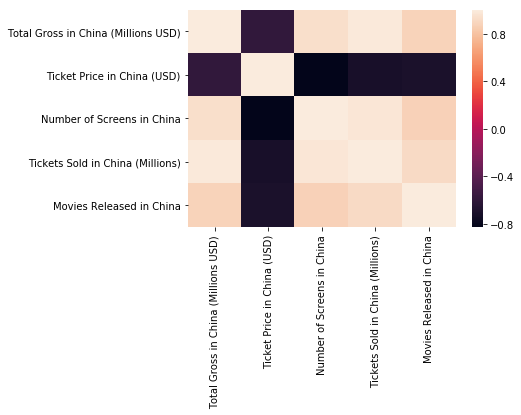

In [129]:
# Correlations in China
China_corr = Modified_Total[["Total Gross in China (Millions USD)","Ticket Price in China (USD)","Number of Screens in China","Tickets Sold in China (Millions)","Movies Released in China"]]
China_matrix = China_corr.corr()
sns.heatmap(China_matrix)
plt.show()

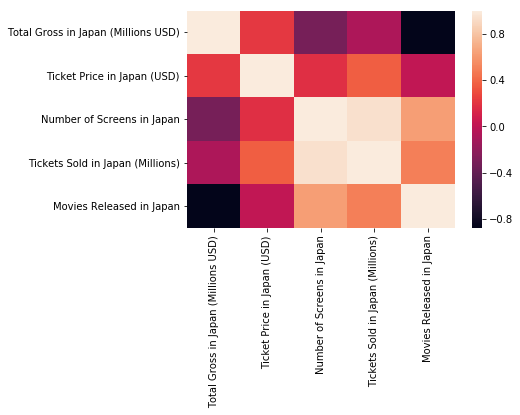

In [130]:
# Correlations in Japan
Japan_corr = Modified_Total[["Total Gross in Japan (Millions USD)","Ticket Price in Japan (USD)","Number of Screens in Japan","Tickets Sold in Japan (Millions)","Movies Released in Japan"]]
Japan_matrix = Japan_corr.corr()
sns.heatmap(Japan_matrix)
plt.show()

### Comparing Grosses

In [131]:
# T-Test Comparison of Grosses
gross_c = Modified_Total["Total Gross in China (Millions USD)"]
gross_j = Modified_Total["Total Gross in Japan (Millions USD)"]
t_test_gross = stats.ttest_ind(gross_c,gross_j)

print("For comparing total gross in China and Japan, the t-statistic is {:2.3f} and the p-value is {:2.3f}.".format(
    t_test_gross[0],t_test_gross[1]))

For comparing total gross in China and Japan, the t-statistic is 3.594 and the p-value is 0.007.


### Tickets Sold

In [132]:
# Correlation of Gross and Tickets Sold in China
ticket_s_c = Modified_Total["Tickets Sold in China (Millions)"]
ticket_price_C_corr = stats.pearsonr(gross_c,ticket_s_c)
print("In China, the correlation between total gross and tickets sold has a coefficient of {:2.3f} and a p-value of {:2.3f}.".format(
    ticket_price_C_corr[0],ticket_price_C_corr[1]))

# Correlation of Gross and Tickets Sold in Japan
ticket_s_j = Modified_Total["Tickets Sold in Japan (Millions)"]
ticket_sold_J_corr = stats.pearsonr(gross_j,ticket_s_j)
print("In Japan, the correlation between total gross and tickets sold has a coefficient of {:2.3f} and a p-value of {:2.3f}.".format(
    ticket_sold_J_corr[0],ticket_sold_J_corr[1]))


In China, the correlation between total gross and tickets sold has a coefficient of 0.986 and a p-value of 0.002.
In Japan, the correlation between total gross and tickets sold has a coefficient of -0.077 and a p-value of 0.902.


In [133]:
# T-Test of Tickets Sold
t_test_ticket_sales = stats.ttest_ind(ticket_s_c,ticket_s_j)
print("For comparing the tickets sold in China and Japan, the t-statistic is {:2.5f} and the p-value is {:2.5f}.".format(
    t_test_ticket_sales[0],t_test_ticket_sales[1]))


For comparing the tickets sold in China and Japan, the t-statistic is 4.19599 and the p-value is 0.00301.


### Tickets Per Hundred Thousand

In [134]:
# Correlation of Gross and Tickets per Hundred Thousands in China
ticket_hun_thou_c = Modified_Total['Tickets Sold per 100,000 Population in China']
ticket_hun_thou_c_corr = stats.pearsonr(gross_c,ticket_hun_thou_c)
print("In China, for tickets sold per hundred thousand sold, the coefficient is {:2.3f} and the p-value is {:2.3f}.".format(ticket_hun_thou_c_corr[0],ticket_hun_thou_c_corr[1]))

# Correlation of Gross and Tickets per Hundred Thousands in China
ticket_hun_thou_j = Modified_Total['Tickets Sold per 100,000 Population in Japan']
ticket_hun_thou_j_corr = stats.pearsonr(gross_j,ticket_hun_thou_j)
print("In Japan, for tickets sold per hundred thousand sold, the coefficient is {:2.3f} and the p-value is {:2.3f}.".format(
    ticket_hun_thou_j_corr[0],ticket_hun_thou_j_corr[1]))


In China, for tickets sold per hundred thousand sold, the coefficient is 0.987 and the p-value is 0.002.
In Japan, for tickets sold per hundred thousand sold, the coefficient is -0.076 and the p-value is 0.903.


In [135]:
# T-test of Tickets Sold per Hundred Thousand
t_test_ticket_hund_thou = stats.ttest_ind(ticket_hun_thou_c,ticket_hun_thou_j)
print("For comparing the tickets sold per hundred thousands in China and Japan, the t-statistic is {:2.3f} and the p-value is {:2.3f}.".format(
    t_test_ticket_hund_thou[0],t_test_ticket_hund_thou[1]))


For comparing the tickets sold per hundred thousands in China and Japan, the t-statistic is -4.678 and the p-value is 0.002.


### Screens Test

In [136]:
# Correlation of Gross and Screens in China
screens_c = Modified_Total["Number of Screens in China"]
screens_C_corr = stats.pearsonr(gross_c,screens_c)
print("In China, for the number of screens, the cofficient is {:2.3f} and the p-value of {:2.3f}.".format(
    screens_C_corr[0],screens_C_corr[1]))

# Correlation of Gross and Screens in Japan
screens_j = Modified_Total["Number of Screens in Japan"]
screens_J_corr = stats.pearsonr(gross_j,screens_j)
print("In Japan, for the number of screens, the cofficient is {:2.3f} and the p-value of {:2.3f}.".format(
    screens_J_corr[0],screens_J_corr[1]))


In China, for the number of screens, the cofficient is 0.937 and the p-value of 0.019.
In Japan, for the number of screens, the cofficient is -0.310 and the p-value of 0.612.


In [137]:
# T-test of Screens
t_test_screens = stats.ttest_ind(screens_c,screens_j)
print("For comparing the number of screens in China and Japan, the t-statistic is {:2.3f} and the p-value is {:2.3f}.".format(t_test_screens[0],t_test_screens[1]))


For comparing the number of screens in China and Japan, the t-statistic is 4.474 and the p-value is 0.002.


### Ticket Price

In [138]:
# Correlation of Gross and Ticket Price in China
ticket_p_c = Modified_Total["Ticket Price in China (USD)"]
ticket_price_C_corr = stats.pearsonr(gross_c,ticket_p_c)
print("In China, for ticket price, the coefficient is {:2.3f} and the p-value is {:2.3f}.".format(
    ticket_price_C_corr[0],ticket_price_C_corr[1]))

# Correlation of Gross and Ticket Price in Japan
ticket_p_j = Modified_Total["Ticket Price in Japan (USD)"]
ticket_price_J_corr = stats.pearsonr(gross_j,ticket_p_j)
print("In Japan, for ticket price, the coefficient is {:2.3f} and the p-value of {:2.3f}.".format(
    ticket_price_J_corr[0],ticket_price_J_corr[1]))


In China, for ticket price, the coefficient is -0.587 and the p-value is 0.298.
In Japan, for ticket price, the coefficient is 0.219 and the p-value of 0.723.


In [139]:
# T-test of Ticket Prices
t_test_ticket_price = stats.ttest_ind(ticket_p_c,ticket_p_j)
print("For comparing the ticket prices in China and Japan, the t-statistic is {:2.3f} and the p-value is {:2.5f}.".format(
    t_test_ticket_price[0],t_test_ticket_price[1]))


For comparing the ticket prices in China and Japan, the t-statistic is -24.120 and the p-value is 0.00000.


### Movies Released

In [140]:
# Correlation of Gross and Movies Released in China
movie_c = Modified_Total["Movies Released in China"]
movie_C_corr = stats.pearsonr(gross_c,movie_c)
print("In Japan, for number of movies released, the coefficient is {:2.5f} and the p-value of {:2.5f}.".format(
    movie_C_corr[0],movie_C_corr[1]))

# Correlation of Gross and Movies Released in Japan
movie_j = Modified_Total["Movies Released in Japan"]
movie_J_corr = stats.pearsonr(gross_j,movie_j)
print("In China, for number of movies released, the coefficient is {:2.5f} and the p-value of {:2.5f}.".format(
    movie_J_corr[0],movie_J_corr[1]))


In Japan, for number of movies released, the coefficient is 0.88475 and the p-value of 0.04614.
In China, for number of movies released, the coefficient is -0.87673 and the p-value of 0.05098.


In [141]:
# T-test of Number of Movies Released
t_test_movie_release = stats.ttest_ind(movie_c,movie_j)
print("For comparing the ticket prices in China and Japan, the t-statistic is {:2.3f} and the p-value is {:2.3f}.".format(
    t_test_movie_release[0],t_test_movie_release[1]))


For comparing the ticket prices in China and Japan, the t-statistic is -13.231 and the p-value is 0.000.


### Total

In [142]:
comparison_total = pd.concat([gross_c,gross_j,
                              ticket_s_c,ticket_s_j,
                              ticket_hun_c,ticket_hun_j,
                              screens_c,screens_j,
                              ticket_p_c,ticket_p_j,
                              movie_c,movie_j],axis=1,ignore_index = True)
list_labels_comparison_total = ['Total Gross in China (Millions USD)','Total Gross in Japan (Millions USD)',
                                'Tickets Sold in China (Millions)','Tickets Sold in Japan (Millions)', 
                                'Tickets Sold per 100,000 Population in China','Tickets Sold per 100,000 Population in Japan',
                                'Number of Screens in China','Number of Screens in Japan',
                                'Ticket Price in China (USD)','Ticket Price in Japan (USD)',
                                'Movies Released in China','Movies Released in Japan']
comparison_total.columns = list_labels_comparison_total

comparison_total

,Total Gross in China (Millions USD),Total Gross in Japan (Millions USD),Tickets Sold in China (Millions),Tickets Sold in Japan (Millions),"Tickets Sold per 100,000 Population in China","Tickets Sold per 100,000 Population in Japan",Number of Screens in China,Number of Screens in Japan,Ticket Price in China (USD),Ticket Price in Japan (USD),Movies Released in China,Movies Released in Japan
0,2658.65,2252.89,463.26,155,34298.0,121570,13118,3290,9.94,17.01,394,983
1,3549.43,1845.48,614.24,156,45252.0,122318,18195,3318,9.97,17.74,345,1117
2,4746.84,1727.44,834.31,161,61154.0,126588,23592,3364,9.94,16.65,389,1184
3,6771.67,1805.26,1260.89,167,91954.0,131059,31627,3437,9.86,16.87,522,1136
4,6549.70,2013.58,1373.63,180,99635.0,141887,41056,3472,8.92,17.81,531,1149


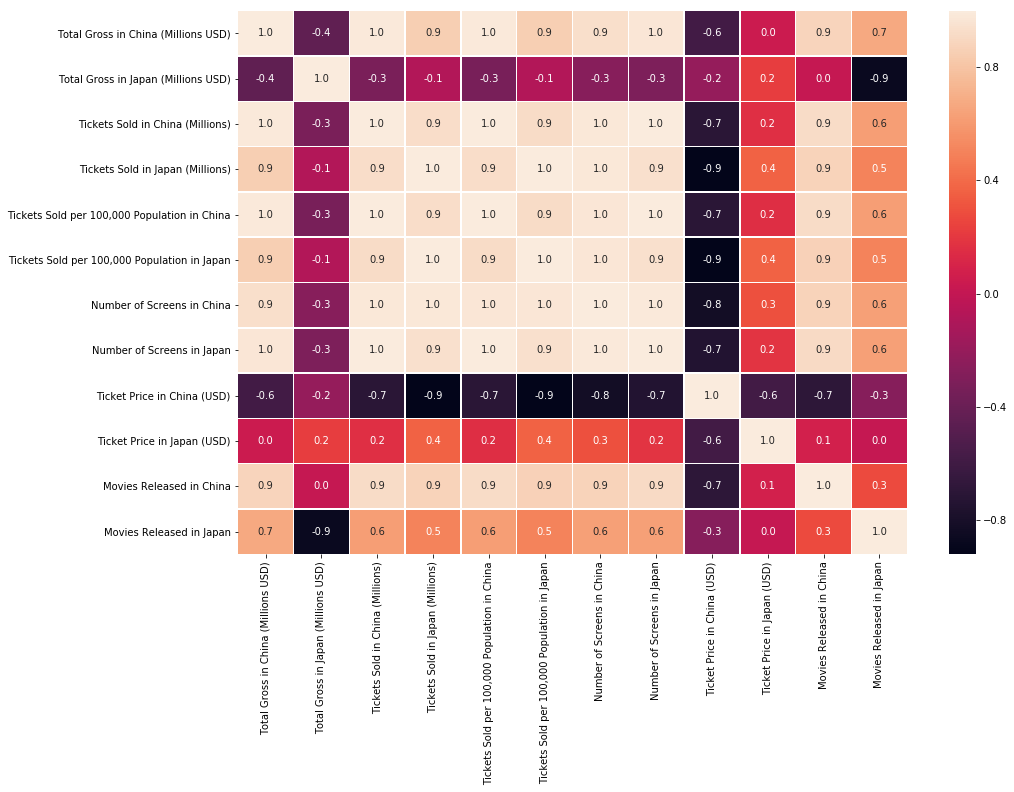

In [143]:
f,ax = plt.subplots(figsize=(15, 10))
sns.heatmap(comparison_total.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)